# IMDB Word Embeddings Analysis

Implementing Skip-gram, CBOW, and Pretrained GloVe on IMDB reviews

In [ ]:
!pip install gensim matplotlib nltk pandas scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9

In [ ]:
!pip install --upgrade numpy scipy -q
!pip install gensim matplotlib nltk pandas scikit-learn -q

print("Packages installed. RESTART RUNTIME NOW!")
print("Go to: Runtime → Restart runtime")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 49.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.4 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.2 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you ha

In [ ]:
!pip install nltk
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim.downloader as api
from google.colab import files

nltk.download('punkt', quiet=True)
print("Libraries loaded")

Libraries loaded


## Upload and Extract Dataset

In [ ]:
zip_name = "/content/archive (1).zip"
print(f"\nExtracting {zip_name}...")

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall('data')

csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
csv_path = os.path.join('data', csv_files[0])

print(f"Found: {csv_files[0]}")


Extracting /content/archive (1).zip...
Found: IMDB Dataset.csv


## Load and Preprocess Data

In [ ]:
df = pd.read_csv(csv_path)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nSentiment counts:\n{df['sentiment'].value_counts()}")
df.head(3)

Dataset shape: (50000, 2)

Columns: ['review', 'sentiment']

Sentiment counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return simple_preprocess(text, deacc=True)

df['tokens'] = df['review'].apply(clean_text)

sample_size = 10000
df_sample = df.head(sample_size)
print(f"Using {sample_size} reviews")
print(f"Sample: {df_sample['tokens'].iloc[0][:15]}")

Using 10000 reviews
Sample: ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll']


## Skip-gram Model

In [ ]:
print("Training Skip-gram...")
skipgram = Word2Vec(
    sentences=df_sample['tokens'],
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=4,
    epochs=10,
    seed=42
)

print(f"Vocab size: {len(skipgram.wv)}")
skipgram.save("skipgram.model")

Training Skip-gram...
Vocab size: 18246


In [ ]:
words = ['movie', 'film', 'great', 'terrible', 'actor']
for w in words:
    if w in skipgram.wv:
        similar = skipgram.wv.most_similar(w, topn=5)
        print(f"{w}: {[x[0] for x in similar]}")

movie: ['film', 'bled', 'flick', 'it', 'clubbing']
film: ['movie', 'documentary', 'bled', 'diminish', 'marigold']
great: ['wonderful', 'terrific', 'fine', 'excellent', 'good']
terrible: ['horrible', 'awful', 'horrendous', 'bad', 'dreadful']
actor: ['performer', 'actress', 'lauded', 'actors', 'versatile']


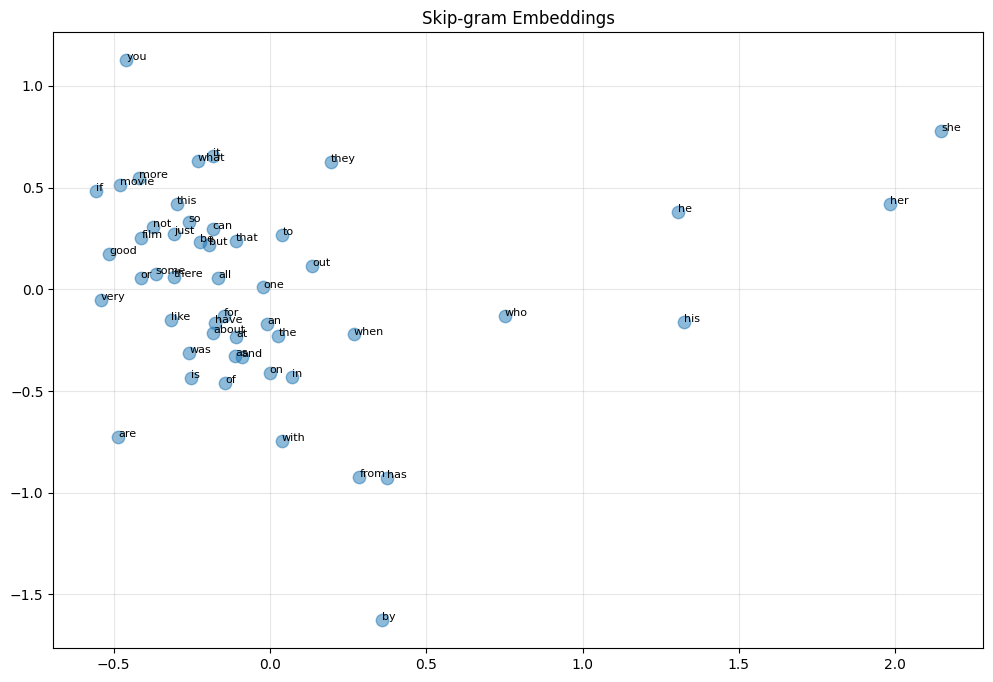

In [ ]:
n_words = 50
vectors = skipgram.wv[skipgram.wv.index_to_key[:n_words]]
pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

plt.figure(figsize=(12, 8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s=80)

for i, word in enumerate(skipgram.wv.index_to_key[:n_words]):
    plt.annotate(word, (coords[i, 0], coords[i, 1]), fontsize=8)

plt.title("Skip-gram Embeddings")
plt.grid(alpha=0.3)
plt.show()

## CBOW Model

In [ ]:
print("Training CBOW...")
cbow = Word2Vec(
    sentences=df_sample['tokens'],
    vector_size=100,
    window=5,
    min_count=5,
    sg=0,
    workers=4,
    epochs=10,
    seed=42
)

print(f"Vocab size: {len(cbow.wv)}")
cbow.save("cbow.model")

Training CBOW...
Vocab size: 18246


In [ ]:
for w in words:
    if w in cbow.wv:
        similar = cbow.wv.most_similar(w, topn=5)
        print(f"{w}: {[x[0] for x in similar]}")

movie: ['film', 'flick', 'documentary', 'show', 'sequel']
film: ['movie', 'documentary', 'flick', 'cinema', 'sequel']
great: ['wonderful', 'fine', 'excellent', 'good', 'amazing']
terrible: ['horrible', 'awful', 'bad', 'atrocious', 'lame']
actor: ['actress', 'role', 'performance', 'artist', 'performer']


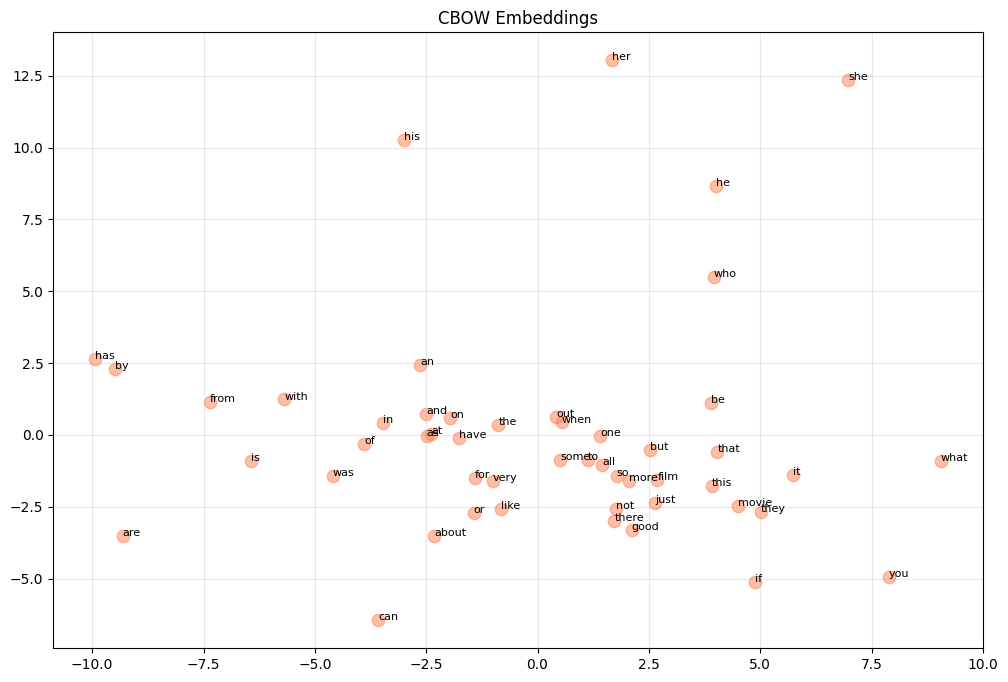

In [ ]:
vectors_cbow = cbow.wv[cbow.wv.index_to_key[:n_words]]
pca_cbow = PCA(n_components=2)
coords_cbow = pca_cbow.fit_transform(vectors_cbow)

plt.figure(figsize=(12, 8))
plt.scatter(coords_cbow[:, 0], coords_cbow[:, 1], alpha=0.5, s=80, c='coral')

for i, word in enumerate(cbow.wv.index_to_key[:n_words]):
    plt.annotate(word, (coords_cbow[i, 0], coords_cbow[i, 1]), fontsize=8)

plt.title("CBOW Embeddings")
plt.grid(alpha=0.3)
plt.show()

## Compare Skip-gram vs CBOW

In [ ]:
test = ['movie', 'great', 'bad', 'actor', 'story']

for w in test:
    if w in skipgram.wv and w in cbow.wv:
        skip_sim = skipgram.wv.most_similar(w, topn=3)
        cbow_sim = cbow.wv.most_similar(w, topn=3)

        print(f"\n{w}:")
        print(f"  Skip-gram: {[x[0] for x in skip_sim]}")
        print(f"  CBOW:      {[x[0] for x in cbow_sim]}")


movie:
  Skip-gram: ['film', 'bled', 'flick']
  CBOW:      ['film', 'flick', 'documentary']

great:
  Skip-gram: ['wonderful', 'terrific', 'fine']
  CBOW:      ['wonderful', 'fine', 'excellent']

bad:
  Skip-gram: ['terrible', 'horrible', 'showgirls']
  CBOW:      ['terrible', 'good', 'awful']

actor:
  Skip-gram: ['performer', 'actress', 'lauded']
  CBOW:      ['actress', 'role', 'performance']

story:
  Skip-gram: ['plot', 'stories', 'storyline']
  CBOW:      ['plot', 'storyline', 'tale']


## Pretrained GloVe

In [ ]:
print("Loading GloVe (this may take a minute)...")
glove = api.load("glove-wiki-gigaword-100")
print(f"Vocab size: {len(glove)}")

Loading GloVe (this may take a minute)...
[==================================================] 100.0% 128.1/128.1MB downloaded
Vocab size: 400000


In [ ]:
test_words = ['movie', 'film', 'actor', 'excellent', 'terrible']
for w in test_words:
    if w in glove:
        similar = glove.most_similar(w, topn=5)
        print(f"{w}: {[x[0] for x in similar]}")

movie: ['film', 'movies', 'films', 'hollywood', 'comedy']
film: ['movie', 'films', 'directed', 'documentary', 'drama']
actor: ['actress', 'comedian', 'starring', 'starred', 'actors']
excellent: ['good', 'quality', 'terrific', 'superb', 'best']
terrible: ['horrible', 'awful', 'dreadful', 'horrendous', 'horrific']


In [ ]:
pairs = [('movie', 'film'), ('good', 'excellent'), ('bad', 'terrible'), ('actor', 'actress')]

for w1, w2 in pairs:
    if w1 in glove and w2 in glove:
        sim = glove.similarity(w1, w2)
        print(f"{w1} - {w2}: {sim:.3f}")

movie - film: 0.906
good - excellent: 0.794
bad - terrible: 0.707
actor - actress: 0.858


In [ ]:
try:
    result = glove.most_similar(positive=['actor', 'woman'], negative=['man'], topn=3)
    print(f"actor - man + woman = {[x[0] for x in result]}")
except:
    print("Analogy failed")

actor - man + woman = ['actress', 'comedian', 'actresses']


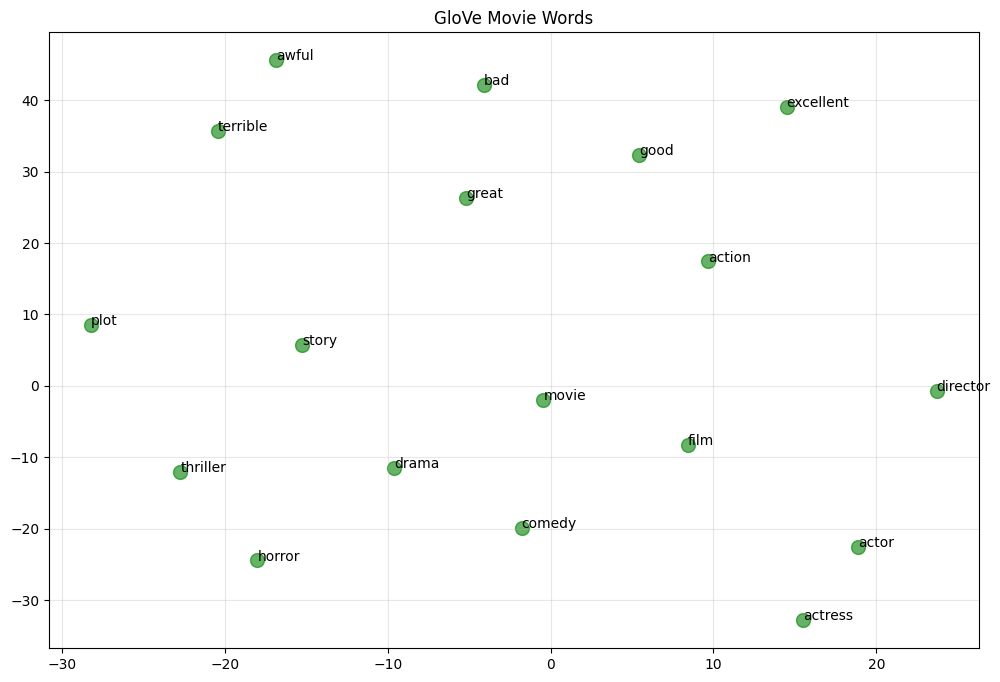

In [ ]:
movie_vocab = ['movie', 'film', 'actor', 'actress', 'director', 'plot', 'story',
               'excellent', 'great', 'good', 'bad', 'terrible', 'awful',
               'comedy', 'drama', 'action', 'thriller', 'horror']

valid_words = [w for w in movie_vocab if w in glove]
word_vecs = np.array([glove[w] for w in valid_words])

tsne = TSNE(n_components=2, random_state=42, perplexity=min(10, len(valid_words)-1))
coords_2d = tsne.fit_transform(word_vecs)

plt.figure(figsize=(12, 8))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1], s=100, alpha=0.6, c='green')

for i, word in enumerate(valid_words):
    plt.annotate(word, (coords_2d[i, 0], coords_2d[i, 1]), fontsize=10)

plt.title("GloVe Movie Words")
plt.grid(alpha=0.3)
plt.show()

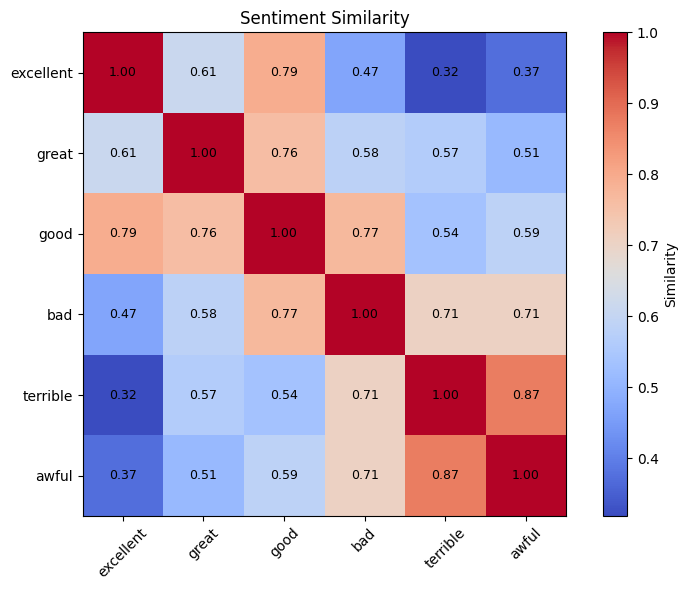

In [ ]:
sentiment = ['excellent', 'great', 'good', 'bad', 'terrible', 'awful']
sentiment_exist = [w for w in sentiment if w in glove]

matrix = np.zeros((len(sentiment_exist), len(sentiment_exist)))
for i, w1 in enumerate(sentiment_exist):
    for j, w2 in enumerate(sentiment_exist):
        matrix[i, j] = glove.similarity(w1, w2)

plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap='coolwarm')
plt.colorbar(label='Similarity')
plt.xticks(range(len(sentiment_exist)), sentiment_exist, rotation=45)
plt.yticks(range(len(sentiment_exist)), sentiment_exist)
plt.title('Sentiment Similarity')

for i in range(len(sentiment_exist)):
    for j in range(len(sentiment_exist)):
        plt.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Summary

In [ ]:
print(f"\nSkip-gram vocab: {len(skipgram.wv)}")
print(f"CBOW vocab: {len(cbow.wv)}")
print(f"GloVe vocab: {len(glove)}")
print("\nDone!")


Skip-gram vocab: 18246
CBOW vocab: 18246
GloVe vocab: 400000

Done!


# FastText - implementation

In [2]:
!pip install numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 --force-reinstall -q
import numpy
print("NumPy version:", numpy.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
NumPy version: 2.0.2


In [ ]:
from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



In [2]:
!pip install nltk
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim.downloader as api
from google.colab import files

nltk.download('punkt', quiet=True)
print("Libraries loaded")

Libraries loaded


In [3]:
zip_name = "/content/archive (1).zip"
print(f"\nExtracting {zip_name}...")

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall('data')

csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
csv_path = os.path.join('data', csv_files[0])

print(f"Found: {csv_files[0]}")


Extracting /content/archive (1).zip...
Found: IMDB Dataset.csv


In [4]:
df = pd.read_csv(csv_path)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nSentiment counts:\n{df['sentiment'].value_counts()}")
df.head(3)

Dataset shape: (50000, 2)

Columns: ['review', 'sentiment']

Sentiment counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [5]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return simple_preprocess(text, deacc=True)

df['tokens'] = df['review'].apply(clean_text)

sample_size = 10000
df_sample = df.head(sample_size)
print(f"Using {sample_size} reviews")
print(f"Sample: {df_sample['tokens'].iloc[0][:15]}")

Using 10000 reviews
Sample: ['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll']


In [7]:
sentences = df_sample['tokens'].tolist()

fasttext_model = FastText(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,              # skip-gram
    epochs=5
)

fasttext_model.save("fasttext_skipgram.model")
print("FastText (Skip-gram) Model Trained and Saved.")


FastText (Skip-gram) Model Trained and Saved.


In [9]:
# out-of-vocab (misspellings or new forms)
test_words = ["movie", "film", "movvie", "goood", "excellent", "terrible", "happines", "joyful"]

for word in test_words:
    try:
        similar = fasttext_model.wv.most_similar(word)
        print(f"\n - {word} → Similar words:")
        for sim_word, score in similar[:5]:
            print(f"   {sim_word:15s}  ({score:.3f})")
    except KeyError:
        print(f"\n - {word} not found in FastText vocabulary.")


 - movie → Similar words:
   film             (0.902)
   flick            (0.740)
   it               (0.734)
   flicker          (0.730)
   docu             (0.726)

 - film → Similar words:
   movie            (0.902)
   document         (0.774)
   documentary      (0.770)
   docu             (0.747)
   documented       (0.746)

 - movvie → Similar words:
   movie            (0.806)
   grinch           (0.800)
   juhi             (0.793)
   moi              (0.786)
   lollobrigida     (0.784)

 - goood → Similar words:
   good             (0.869)
   goody            (0.857)
   google           (0.855)
   goodfellas       (0.851)
   goof             (0.849)

 - excellent → Similar words:
   excellence       (0.910)
   excellently      (0.895)
   excel            (0.889)
   repellent        (0.845)
   excels           (0.833)

 - terrible → Similar words:
   horrible         (0.929)
   awful            (0.845)
   horrid           (0.792)
   dribble          (0.776)
   abysmal         

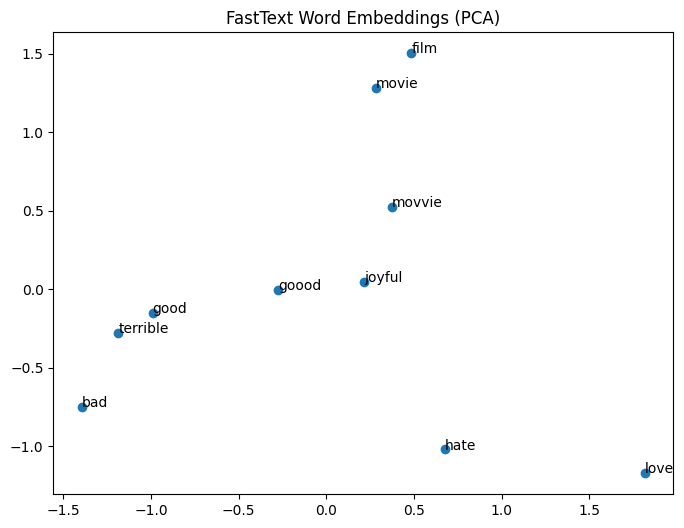

In [10]:
def visualize_fasttext_words(model, words, title):
    vectors = np.array([model.wv[w] for w in words if w in model.wv])
    reduced = PCA(n_components=2).fit_transform(vectors)

    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:,0], reduced[:,1])
    for i, word in enumerate(words):
        if word in model.wv:
            plt.annotate(word, xy=(reduced[i,0], reduced[i,1]))
    plt.title(title)
    plt.show()

sample_words = ["good", "bad", "love", "hate", "film", "movie", "movvie", "goood", "joyful", "terrible"]
visualize_fasttext_words(fasttext_model, sample_words, "FastText Word Embeddings (PCA)")
